In [30]:
# Imports.
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from nets import EulerN
from data_utils import CSVData
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

# 1. Linear system.

In [10]:
# Choose your network parameters.
input_size=2
num_param=1
hidden_size=20
h=1

# Initialise the model.
model = EulerN(input_size, num_param, hidden_size, h)

In [11]:
# Load data.
dataset = CSVData(csv_file_path='first_model.csv')
dataloader = DataLoader(dataset, batch_size=100, shuffle=True)

In [12]:
# Loss & optimizer.
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.01)


for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, params, labels = data
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs, params)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.9f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 0.069294649
[1,  4000] loss: 0.001521665
[1,  6000] loss: 0.000868757
[1,  8000] loss: 0.000206812
[1, 10000] loss: 0.000059823
[2,  2000] loss: 0.000038911
[2,  4000] loss: 0.000029285
[2,  6000] loss: 0.000023556
[2,  8000] loss: 0.000019669
[2, 10000] loss: 0.000017253
[3,  2000] loss: 0.000015782
[3,  4000] loss: 0.000015088
[3,  6000] loss: 0.000014444
[3,  8000] loss: 0.000013899
[3, 10000] loss: 0.000013477
[4,  2000] loss: 0.000013244
[4,  4000] loss: 0.000013107
[4,  6000] loss: 0.000012988
[4,  8000] loss: 0.000012931
[4, 10000] loss: 0.000012926
[5,  2000] loss: 0.000012854
[5,  4000] loss: 0.000012804
[5,  6000] loss: 0.000012787
[5,  8000] loss: 0.000012735
[5, 10000] loss: 0.000012685
[6,  2000] loss: 0.000012656
[6,  4000] loss: 0.000012585
[6,  6000] loss: 0.000012597
[6,  8000] loss: 0.000012525
[6, 10000] loss: 0.000012515
[7,  2000] loss: 0.000012489
[7,  4000] loss: 0.000012469
[7,  6000] loss: 0.000012433
[7,  8000] loss: 0.000012412
[7, 10000] los

In [13]:
def flow(alpha, x, y):
    u = -alpha * x - alpha * y
    v = 0.25 * x
    return u,v

In [14]:
def euler(alpha, delta, y):
    u,v= flow(alpha, y[0], y[1])
    return y + delta * np.asarray([u, v])

In [15]:
def plot_face_portrait(alpha, index, grid, model):
    Y, X = np.mgrid[100:-100:20j, 100:-100:20j]
    U,V = flow(alpha, X, Y)
    trajectory1 = []
    trajectory2 = []
    y1 = [100, -100]
    y2 = [100, -100]
    for i in range(10000):
        trajectory1.append(y1)
        y1 = euler(alpha, 0.01, y1)
        trajectory2.append(y2)
        y2 = model(torch.FloatTensor(y2).unsqueeze(0), torch.FloatTensor([alpha]).unsqueeze(0)).tolist()[0]
    trajectory1 = np.asarray(trajectory1).T
    trajectory2 = np.asarray(trajectory2).T
    ax = plt.subplot(grid[index, 0])
    ax.streamplot(X, Y, U, V, density=[0.5, 1])
    ax.plot(trajectory1[0], trajectory1[1])
    ax.plot(trajectory2[0], trajectory2[1])
    ax.set_title('Alpha: ' + str(alpha))
    return

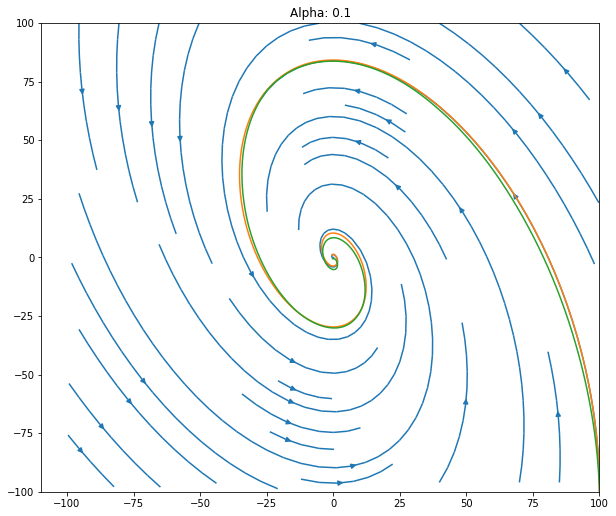

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

alphas = [0.1]

fig = plt.figure(figsize=(10, 50))
gs = gridspec.GridSpec(nrows=5, ncols=1)

for i in range(len(alphas)):
    plot_face_portrait(alphas[i], i, gs, model)

# 2. Andronov-Hopf system

In [20]:
# Choose your network parameters.
input_size=2
num_param=1
hidden_size=20
h=1

# Initialise the model.
model_2 = EulerN(input_size, num_param, hidden_size, h, 3)

In [21]:
# Load data.
dataset_2 = CSVData(csv_file_path='second_model_2.csv')
dataloader_2 = DataLoader(dataset_2, batch_size=1000, shuffle=True)

In [22]:
# Loss & optimizer.
criterion_2 = nn.MSELoss()
optimizer_2 = optim.SGD(model_2.parameters(), lr=0.001, momentum=0.9, weight_decay=0.01)


for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(dataloader_2, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, params, labels = data
        
        # zero the parameter gradients
        optimizer_2.zero_grad()

        # forward + backward + optimize
        outputs = model_2(inputs, params)
        loss = criterion_2(outputs, labels)
        loss.backward()
        optimizer_2.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.9f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,   200] loss: 0.000964987
[1,   400] loss: 0.000089008
[1,   600] loss: 0.000073085
[2,   200] loss: 0.000058893
[2,   400] loss: 0.000051149
[2,   600] loss: 0.000044973
[3,   200] loss: 0.000037439
[3,   400] loss: 0.000033695
[3,   600] loss: 0.000030075
[4,   200] loss: 0.000026147
[4,   400] loss: 0.000024346
[4,   600] loss: 0.000022330
[5,   200] loss: 0.000020331
[5,   400] loss: 0.000018878
[5,   600] loss: 0.000018123
[6,   200] loss: 0.000016962
[6,   400] loss: 0.000016096
[6,   600] loss: 0.000015733
[7,   200] loss: 0.000015146
[7,   400] loss: 0.000014866
[7,   600] loss: 0.000014315
[8,   200] loss: 0.000014134
[8,   400] loss: 0.000014022
[8,   600] loss: 0.000013871
[9,   200] loss: 0.000013804
[9,   400] loss: 0.000013665
[9,   600] loss: 0.000013431
[10,   200] loss: 0.000013354
[10,   400] loss: 0.000013422
[10,   600] loss: 0.000013473
Finished Training


In [23]:
# Andronov-Hopf bifurcation
def andronov_hopf(x1, x2, a):
    dx1 = a*x1 - x2 - x1*(x1**2 + x2**2)
    dx2 = x1 + a*x2 - x2*(x1**2 + x2**2)
    return dx1, dx2

In [24]:
def euler(alpha, delta, y):
    u,v= andronov_hopf(y[0], y[1], alpha)
    return y + delta * np.asarray([u, v])

In [25]:
def plot_face_portrait(alpha, index, grid, model):
    Y, X = np.mgrid[2:-2:20j, 2:-2:20j]
    U,V = andronov_hopf(X, Y, alpha)
    trajectory1 = []
    trajectory2 = []
    y1 = [-2, 2]
    y2 = [-2, 2]
    for i in range(100000):
        #trajectory1.append(y1)
        #y1 = euler(alpha, 0.001, y1)
        trajectory2.append(y2)
        y2 = model(torch.FloatTensor(y2).unsqueeze(0), torch.FloatTensor([alpha]).unsqueeze(0)).tolist()[0]
    trajectory1 = np.asarray(trajectory1).T
    trajectory2 = np.asarray(trajectory2).T
    ax = plt.subplot(grid[index, 0])
    ax.streamplot(X, Y, U, V, density=[0.5, 1])
    print(trajectory2)
    #ax.plot(trajectory1[0], trajectory1[1])
    ax.plot(trajectory2[0], trajectory2[1])
    ax.set_title('Alpha: ' + str(alpha))
    plt.show()
    return

[[-2.         -1.99182796 -1.98364294 ...  0.67803478  0.67803478
   0.67803478]
 [ 2.          1.9983778   1.99675548 ...  2.3907795   2.3907795
   2.3907795 ]]


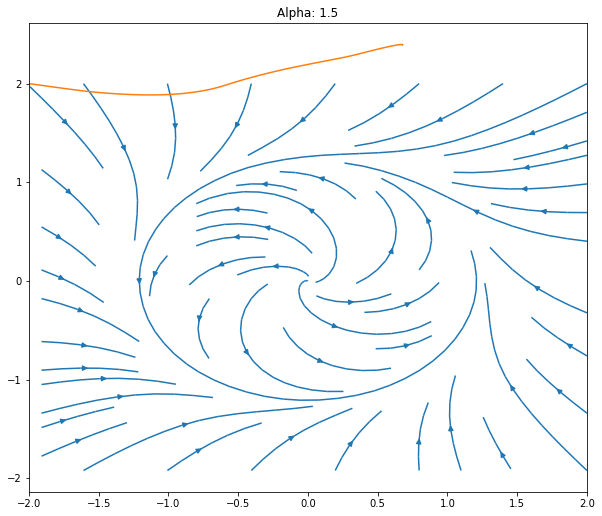

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

alphas = [1.5]

fig = plt.figure(figsize=(10, 50))
gs = gridspec.GridSpec(nrows=5, ncols=1)

for i in range(len(alphas)):
    plot_face_portrait(alphas[i], i, gs, model_2)

-----------------------------------------------------------
bs=1000 hs=25 lr=0.01 mm=0.9 wd=0.01 nhl=3
[ 1,  200] loss: 0.009448991
[ 1,  400] loss: 0.008044451
[ 2,  200] loss: 0.007981716
[ 2,  400] loss: 0.008157812
[ 3,  200] loss: 0.008420682
[ 3,  400] loss: 0.008548044
[ 4,  200] loss: 0.008685058
[ 4,  400] loss: 0.009004556
[ 5,  200] loss: 0.008833595
[ 5,  400] loss: 0.009147280
[ 6,  200] loss: 0.009010443
[ 6,  400] loss: 0.009293854
[ 7,  200] loss: 0.009220609
[ 7,  400] loss: 0.009162828
[ 8,  200] loss: 0.009190350
[ 8,  400] loss: 0.009295836
[ 9,  200] loss: 0.009337811
[ 9,  400] loss: 0.009078941
[10,  200] loss: 0.009272461
[10,  400] loss: 0.009262627
Finished Training
Train loss: 0.009249533
Valid loss: 0.009358717


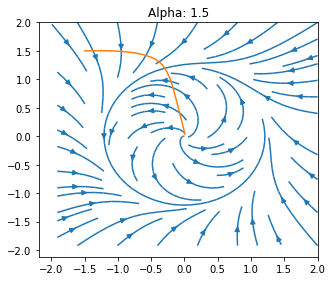

-----------------------------------------------------------
bs=1000 hs=25 lr=0.01 mm=0.9 wd=0.01 nhl=5
[ 1,  200] loss: 0.011468644
[ 1,  400] loss: 0.010076871
[ 2,  200] loss: 0.010048032
[ 2,  400] loss: 0.010334473
[ 3,  200] loss: 0.010166747
[ 3,  400] loss: 0.010201240
[ 4,  200] loss: 0.010255831
[ 4,  400] loss: 0.010236917
[ 5,  200] loss: 0.010187759
[ 5,  400] loss: 0.010358309
[ 6,  200] loss: 0.010142983
[ 6,  400] loss: 0.010376437
[ 7,  200] loss: 0.010278018
[ 7,  400] loss: 0.010310366
[ 8,  200] loss: 0.010313545
[ 8,  400] loss: 0.010225837
[ 9,  200] loss: 0.010240563
[ 9,  400] loss: 0.010280864
[10,  200] loss: 0.010271064
[10,  400] loss: 0.010159059
Finished Training
Train loss: 0.010280534
Valid loss: 0.010394137


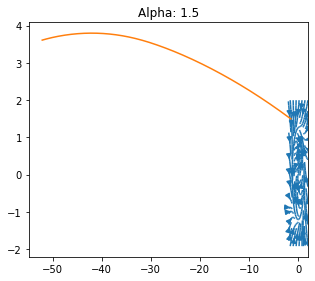

-----------------------------------------------------------
bs=1000 hs=25 lr=0.01 mm=0.9 wd=0.001 nhl=3
[ 1,  200] loss: 0.008850175
[ 1,  400] loss: 0.007330865
[ 2,  200] loss: 0.006326384
[ 2,  400] loss: 0.005765834
[ 3,  200] loss: 0.005153879
[ 3,  400] loss: 0.004812336
[ 4,  200] loss: 0.004278851
[ 4,  400] loss: 0.003992696
[ 5,  200] loss: 0.003534205
[ 5,  400] loss: 0.003311622
[ 6,  200] loss: 0.002950439
[ 6,  400] loss: 0.002724127
[ 7,  200] loss: 0.002504385
[ 7,  400] loss: 0.002368934
[ 8,  200] loss: 0.002164118
[ 8,  400] loss: 0.002121684
[ 9,  200] loss: 0.001966224
[ 9,  400] loss: 0.001891613
[10,  200] loss: 0.001796512
[10,  400] loss: 0.001781905
Finished Training
Train loss: 0.001721377
Valid loss: 0.001745693


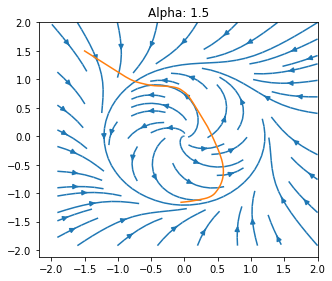

-----------------------------------------------------------
bs=1000 hs=25 lr=0.01 mm=0.9 wd=0.001 nhl=5
[ 1,  200] loss: 0.010712648
[ 1,  400] loss: 0.009889982
[ 2,  200] loss: 0.009547102
[ 2,  400] loss: 0.009620382
[ 3,  200] loss: 0.009461111
[ 3,  400] loss: 0.009200344
[ 4,  200] loss: 0.009142642
[ 4,  400] loss: 0.009057171
[ 5,  200] loss: 0.008953034
[ 5,  400] loss: 0.008975093
[ 6,  200] loss: 0.008858657
[ 6,  400] loss: 0.008776310
[ 7,  200] loss: 0.008731289
[ 7,  400] loss: 0.008691756
[ 8,  200] loss: 0.008531073
[ 8,  400] loss: 0.008593639
[ 9,  200] loss: 0.008523513
[ 9,  400] loss: 0.008377034
[10,  200] loss: 0.008316649
[10,  400] loss: 0.008565134
Finished Training
Train loss: 0.008354522
Valid loss: 0.008461664


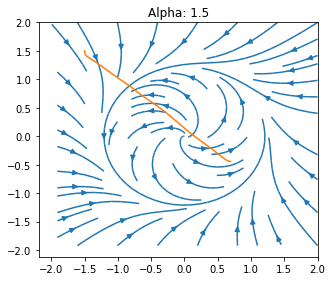

-----------------------------------------------------------
bs=1000 hs=25 lr=0.001 mm=0.9 wd=0.01 nhl=3
[ 1,  200] loss: 0.015096297
[ 1,  400] loss: 0.009985892
[ 2,  200] loss: 0.009496649
[ 2,  400] loss: 0.009201709
[ 3,  200] loss: 0.008878966
[ 3,  400] loss: 0.008794431
[ 4,  200] loss: 0.008423801
[ 4,  400] loss: 0.008727348
[ 5,  200] loss: 0.008382339
[ 5,  400] loss: 0.008331291
[ 6,  200] loss: 0.008157417
[ 6,  400] loss: 0.008259317
[ 7,  200] loss: 0.008100509
[ 7,  400] loss: 0.008150564
[ 8,  200] loss: 0.008102369
[ 8,  400] loss: 0.008043730
[ 9,  200] loss: 0.008174034
[ 9,  400] loss: 0.007850202
[10,  200] loss: 0.008067147
[10,  400] loss: 0.007982102
Finished Training
Train loss: 0.008003925
Valid loss: 0.008092448


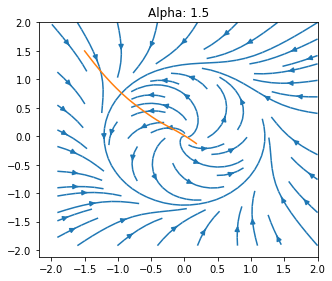

-----------------------------------------------------------
bs=1000 hs=25 lr=0.001 mm=0.9 wd=0.01 nhl=5
[ 1,  200] loss: 0.015402184
[ 1,  400] loss: 0.010224842
[ 2,  200] loss: 0.010240625
[ 2,  400] loss: 0.010305945
[ 3,  200] loss: 0.010131677
[ 3,  400] loss: 0.010254824
[ 4,  200] loss: 0.010219793
[ 4,  400] loss: 0.010371840
[ 5,  200] loss: 0.010230934
[ 5,  400] loss: 0.010384105
[ 6,  200] loss: 0.010384548
[ 6,  400] loss: 0.010062529
[ 7,  200] loss: 0.010374046
[ 7,  400] loss: 0.010219176
[ 8,  200] loss: 0.010288426
[ 8,  400] loss: 0.010323526
[ 9,  200] loss: 0.010265038
[ 9,  400] loss: 0.010382022
[10,  200] loss: 0.010378203
[10,  400] loss: 0.010088872
Finished Training
Train loss: 0.010258954
Valid loss: 0.010370887


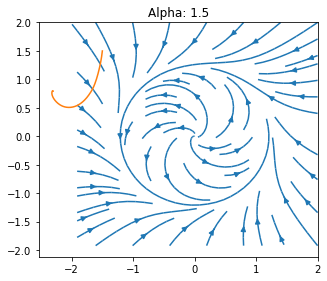

-----------------------------------------------------------
bs=1000 hs=25 lr=0.001 mm=0.9 wd=0.001 nhl=3
[ 1,  200] loss: 0.020027415
[ 1,  400] loss: 0.011597617
[ 2,  200] loss: 0.010780628
[ 2,  400] loss: 0.010329244
[ 3,  200] loss: 0.009769281
[ 3,  400] loss: 0.009389803
[ 4,  200] loss: 0.009030260
[ 4,  400] loss: 0.009005028
[ 5,  200] loss: 0.008492805
[ 5,  400] loss: 0.008597483
[ 6,  200] loss: 0.008334883
[ 6,  400] loss: 0.008122281
[ 7,  200] loss: 0.007965078
[ 7,  400] loss: 0.007884867
[ 8,  200] loss: 0.007708409
[ 8,  400] loss: 0.007756404
[ 9,  200] loss: 0.007663558
[ 9,  400] loss: 0.007464240
[10,  200] loss: 0.007373775
[10,  400] loss: 0.007417818
Finished Training
Train loss: 0.007287647
Valid loss: 0.007376743


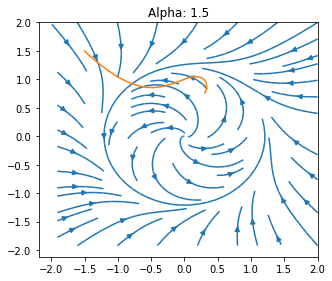

-----------------------------------------------------------
bs=1000 hs=25 lr=0.001 mm=0.9 wd=0.001 nhl=5
[ 1,  200] loss: 0.013687944
[ 1,  400] loss: 0.010322662
[ 2,  200] loss: 0.010184026
[ 2,  400] loss: 0.010138515
[ 3,  200] loss: 0.010184751
[ 3,  400] loss: 0.010137002
[ 4,  200] loss: 0.010084708
[ 4,  400] loss: 0.010134854
[ 5,  200] loss: 0.010380638
[ 5,  400] loss: 0.010131878
[ 6,  200] loss: 0.010149056
[ 6,  400] loss: 0.010161702
[ 7,  200] loss: 0.010160774
[ 7,  400] loss: 0.010153738
[ 8,  200] loss: 0.010180220
[ 8,  400] loss: 0.010205813
[ 9,  200] loss: 0.010158624
[ 9,  400] loss: 0.010139966
[10,  200] loss: 0.010167719
[10,  400] loss: 0.010121472
Finished Training
Train loss: 0.010146938
Valid loss: 0.010255420


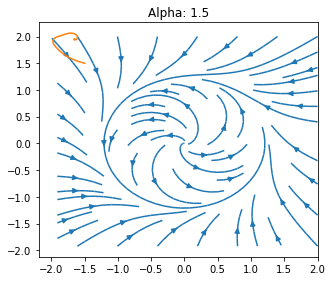

-----------------------------------------------------------
bs=1000 hs=50 lr=0.01 mm=0.9 wd=0.01 nhl=3
[ 1,  200] loss: 0.010686972
[ 1,  400] loss: 0.008073201
[ 2,  200] loss: 0.007531248
[ 2,  400] loss: 0.007696104
[ 3,  200] loss: 0.007866566
[ 3,  400] loss: 0.008148079
[ 4,  200] loss: 0.008036505
[ 4,  400] loss: 0.008281351
[ 5,  200] loss: 0.008250173
[ 5,  400] loss: 0.008328925
[ 6,  200] loss: 0.008410805
[ 6,  400] loss: 0.008181097
[ 7,  200] loss: 0.008305789
[ 7,  400] loss: 0.008300900
[ 8,  200] loss: 0.008372517
[ 8,  400] loss: 0.008412321
[ 9,  200] loss: 0.008395491
[ 9,  400] loss: 0.008309473
[10,  200] loss: 0.008453517
[10,  400] loss: 0.008208996
Finished Training
Train loss: 0.008295875
Valid loss: 0.008392091


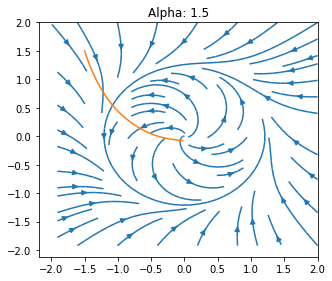

-----------------------------------------------------------
bs=1000 hs=50 lr=0.01 mm=0.9 wd=0.01 nhl=5
[ 1,  200] loss: 0.010648708
[ 1,  400] loss: 0.010022081
[ 2,  200] loss: 0.010092478
[ 2,  400] loss: 0.010209977
[ 3,  200] loss: 0.010004845
[ 3,  400] loss: 0.010271157
[ 4,  200] loss: 0.010166668
[ 4,  400] loss: 0.010398288
[ 5,  200] loss: 0.010233500
[ 5,  400] loss: 0.010192210
[ 6,  200] loss: 0.010309735
[ 6,  400] loss: 0.010303631
[ 7,  200] loss: 0.010044796
[ 7,  400] loss: 0.010408694
[ 8,  200] loss: 0.010404845
[ 8,  400] loss: 0.010253721
[ 9,  200] loss: 0.010216446
[ 9,  400] loss: 0.010396548
[10,  200] loss: 0.010261841
[10,  400] loss: 0.010199053
Finished Training
Train loss: 0.010280176
Valid loss: 0.010393440


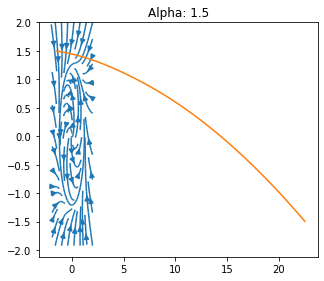

-----------------------------------------------------------
bs=1000 hs=50 lr=0.01 mm=0.9 wd=0.001 nhl=3
[ 1,  200] loss: 0.009845596
[ 1,  400] loss: 0.008245990
[ 2,  200] loss: 0.006652823
[ 2,  400] loss: 0.005910108
[ 3,  200] loss: 0.005017080
[ 3,  400] loss: 0.004565082
[ 4,  200] loss: 0.003896089
[ 4,  400] loss: 0.003582146
[ 5,  200] loss: 0.003080741
[ 5,  400] loss: 0.002944883
[ 6,  200] loss: 0.002639447
[ 6,  400] loss: 0.002431096
[ 7,  200] loss: 0.002207391
[ 7,  400] loss: 0.002118929
[ 8,  200] loss: 0.001923458
[ 8,  400] loss: 0.001865243
[ 9,  200] loss: 0.001740316
[ 9,  400] loss: 0.001639793
[10,  200] loss: 0.001583119
[10,  400] loss: 0.001498949
Finished Training
Train loss: 0.001456181
Valid loss: 0.001479354


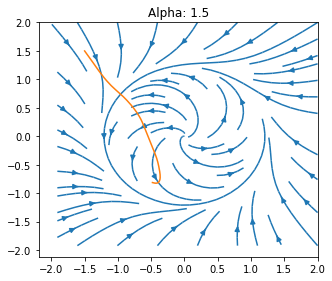

-----------------------------------------------------------
bs=1000 hs=50 lr=0.01 mm=0.9 wd=0.001 nhl=5
[ 1,  200] loss: 0.011139929
[ 1,  400] loss: 0.010222575
[ 2,  200] loss: 0.010089198
[ 2,  400] loss: 0.009860485
[ 3,  200] loss: 0.009915580
[ 3,  400] loss: 0.009708324
[ 4,  200] loss: 0.009643518
[ 4,  400] loss: 0.009522617
[ 5,  200] loss: 0.009503293
[ 5,  400] loss: 0.009420123
[ 6,  200] loss: 0.009214490
[ 6,  400] loss: 0.009260376
[ 7,  200] loss: 0.009275314
[ 7,  400] loss: 0.009090095
[ 8,  200] loss: 0.009059439
[ 8,  400] loss: 0.008925071
[ 9,  200] loss: 0.008758853
[ 9,  400] loss: 0.008864611
[10,  200] loss: 0.008678222
[10,  400] loss: 0.008799244
Finished Training
Train loss: 0.008644060
Valid loss: 0.008733396


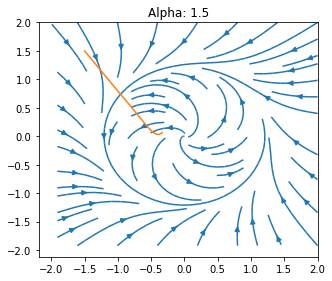

-----------------------------------------------------------
bs=1000 hs=50 lr=0.001 mm=0.9 wd=0.01 nhl=3
[ 1,  200] loss: 0.009938789
[ 1,  400] loss: 0.009734615
[ 2,  200] loss: 0.009078233
[ 2,  400] loss: 0.009286983
[ 3,  200] loss: 0.008848389
[ 3,  400] loss: 0.008776192
[ 4,  200] loss: 0.008620126
[ 4,  400] loss: 0.008481407
[ 5,  200] loss: 0.008449541
[ 5,  400] loss: 0.008325346
[ 6,  200] loss: 0.008241597
[ 6,  400] loss: 0.008250224
[ 7,  200] loss: 0.008039985
[ 7,  400] loss: 0.008117455
[ 8,  200] loss: 0.008056409
[ 8,  400] loss: 0.008101389
[ 9,  200] loss: 0.007893840
[ 9,  400] loss: 0.008045357
[10,  200] loss: 0.008006652
[10,  400] loss: 0.007906502
Finished Training
Train loss: 0.007974763
Valid loss: 0.008075256


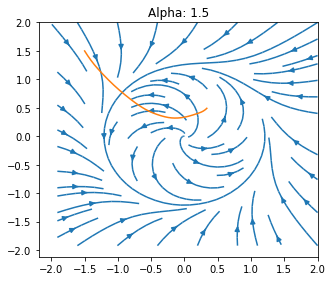

-----------------------------------------------------------
bs=1000 hs=50 lr=0.001 mm=0.9 wd=0.01 nhl=5
[ 1,  200] loss: 0.011211083
[ 1,  400] loss: 0.010461156
[ 2,  200] loss: 0.010500277
[ 2,  400] loss: 0.010444459
[ 3,  200] loss: 0.010492816
[ 3,  400] loss: 0.010218068
[ 4,  200] loss: 0.010172431
[ 4,  400] loss: 0.010313767
[ 5,  200] loss: 0.010142350
[ 5,  400] loss: 0.010311247
[ 6,  200] loss: 0.010170814
[ 6,  400] loss: 0.010102581
[ 7,  200] loss: 0.009984057
[ 7,  400] loss: 0.010255571
[ 8,  200] loss: 0.010053246
[ 8,  400] loss: 0.009981791
[ 9,  200] loss: 0.010080170
[ 9,  400] loss: 0.010044865
[10,  200] loss: 0.009947920
[10,  400] loss: 0.010040993
Finished Training
Train loss: 0.010028289
Valid loss: 0.010140345


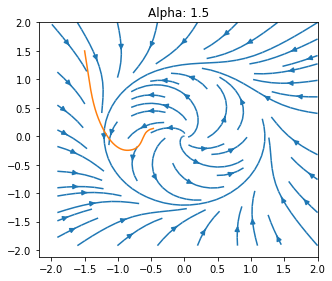

-----------------------------------------------------------
bs=1000 hs=50 lr=0.001 mm=0.9 wd=0.001 nhl=3
[ 1,  200] loss: 0.014738059
[ 1,  400] loss: 0.010153695
[ 2,  200] loss: 0.008971438
[ 2,  400] loss: 0.008758668
[ 3,  200] loss: 0.008021111
[ 3,  400] loss: 0.007893377
[ 4,  200] loss: 0.007497509
[ 4,  400] loss: 0.007189858
[ 5,  200] loss: 0.006984821
[ 5,  400] loss: 0.006950691
[ 6,  200] loss: 0.006637088
[ 6,  400] loss: 0.006634173
[ 7,  200] loss: 0.006359587
[ 7,  400] loss: 0.006277600
[ 8,  200] loss: 0.006121815
[ 8,  400] loss: 0.006025196
[ 9,  200] loss: 0.005924191
[ 9,  400] loss: 0.005798708
[10,  200] loss: 0.005625703
[10,  400] loss: 0.005601410
Finished Training
Train loss: 0.005496291
Valid loss: 0.005556758


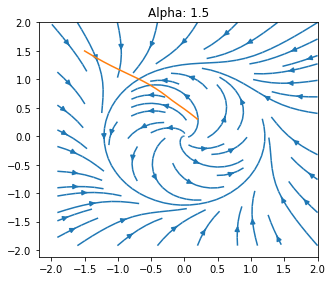

-----------------------------------------------------------
bs=1000 hs=50 lr=0.001 mm=0.9 wd=0.001 nhl=5
[ 1,  200] loss: 0.011997856
[ 1,  400] loss: 0.010298094
[ 2,  200] loss: 0.010479239
[ 2,  400] loss: 0.010202656
[ 3,  200] loss: 0.010311992
[ 3,  400] loss: 0.010443707
[ 4,  200] loss: 0.010422821
[ 4,  400] loss: 0.010287699
[ 5,  200] loss: 0.010316920
[ 5,  400] loss: 0.010313760
[ 6,  200] loss: 0.010224159
[ 6,  400] loss: 0.010207200
[ 7,  200] loss: 0.010243575
[ 7,  400] loss: 0.010147119
[ 8,  200] loss: 0.010150888
[ 8,  400] loss: 0.010212905
[ 9,  200] loss: 0.010130413
[ 9,  400] loss: 0.010248761
[10,  200] loss: 0.010113959
[10,  400] loss: 0.010236118
Finished Training
Train loss: 0.010114230
Valid loss: 0.010227878


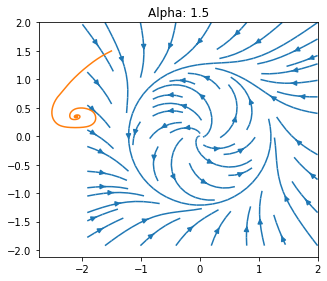

In [62]:
# Andronov-Hopf bifurcation
def andronov_hopf(x1, x2, a):
    dx1 = a*x1 - x2 - x1*(x1**2 + x2**2)
    dx2 = x1 + a*x2 - x2*(x1**2 + x2**2)
    return dx1, dx2

def euler(alpha, delta, y):
    u,v= andronov_hopf(y[0], y[1], alpha)
    return y + delta * np.asarray([u, v])

def plot_face_portrait(alpha, index, grid, model):
    Y, X = np.mgrid[2:-2:20j, 2:-2:20j]
    U,V = andronov_hopf(X, Y, alpha)
    trajectory1 = []
    trajectory2 = []
    y1 = [-1.5, 1.5]
    y2 = [-1.5, 1.5]
    for i in range(100000):
        #trajectory1.append(y1)
        #y1 = euler(alpha, 0.001, y1)
        trajectory2.append(y2)
        y2 = model(torch.FloatTensor(y2).unsqueeze(0), torch.FloatTensor([alpha]).unsqueeze(0)).tolist()[0]
    trajectory1 = np.asarray(trajectory1).T
    trajectory2 = np.asarray(trajectory2).T
    ax = plt.subplot(grid[index, 0])
    ax.streamplot(X, Y, U, V, density=[0.5, 1])
    #ax.plot(trajectory1[0], trajectory1[1])
    ax.plot(trajectory2[0], trajectory2[1])
    ax.set_title('Alpha: ' + str(alpha))
    plt.show()
    return

h = 1

hss = [20, 50]
bss = [100, 250, 500, 1000]
lrs = [0.001, 0.0001]
mms = [0.1, 0.9]
wds = [0.1, 0.01, 0.001]
nhls = [2, 3, 5, 10]

hss = [10, 25, 50]
bss = [1000]
lrs = [0.01, 0.001, 0.0001]
mms = [0.1, 0.9]
wds = [0.01, 0.001]
nhls = [3, 5]

# og
hss = [25, 50]
bss = [1000]
lrs = [0.01, 0.001]
mms = [0.9]
wds = [0.01, 0.001]
nhls = [3, 5]
epochs = 10

# next
hss = [100]
bss = [1000]
lrs = [0.001]
mms = [0.9]
wds = [0.01, 0.001]
nhls = [3, 5]
epochs = 25

validation_split = .2
random_seed = 42

#dataset_2 = CSVData(csv_file_path='second_model_2.csv')
#dataloader_2 = DataLoader(dataset_2, batch_size=1000, shuffle=True)

for bs in bss:
    dataset = CSVData(csv_file_path='second_model_2.csv')
    #dataloader = DataLoader(dataset, batch_size=bs, shuffle=True)
    
    dataset_size = len(dataset)
    indices = list(range(dataset_size))
    split = int(np.floor(validation_split * dataset_size))
    
    np.random.seed(random_seed)
    np.random.shuffle(indices)

    train_indices, val_indices = indices[split:], indices[:split]
    
    train_sampler = SubsetRandomSampler(train_indices)
    valid_sampler = SubsetRandomSampler(val_indices)

    train_loader = DataLoader(dataset, batch_size=bs, sampler=train_sampler)
    valid_loader = DataLoader(dataset, batch_size=bs, sampler=valid_sampler)
    
    for hs in hss:
        for lr in lrs:
            for mm in mms:
                for wd in wds:
                    for nhl in nhls:
                        print('-----------------------------------------------------------')
                        print('bs=' + str(bs), 'hs=' + str(hs), 'lr=' + str(lr), 'mm=' + str(mm), 
                              'wd=' + str(wd), 'nhl=' + str(nhl))
                        model = EulerN(2, 1, hs, h, nhl)
                        criterion = nn.MSELoss()
                        optimizer = optim.SGD(model.parameters(), lr=lr, momentum=mm, weight_decay=wd)
                        
                        for epoch in range(epochs):  # loop over the dataset multiple times
                            running_loss = 0.0
                            for i, data in enumerate(train_loader, 0):
                                # get the inputs; data is a list of [inputs, labels]
                                inputs, params, labels = data
                                
                                # zero the parameter gradients
                                optimizer.zero_grad()

                                # forward + backward + optimize
                                outputs = model(inputs, params)
                                loss = criterion(outputs, labels)
                                loss.backward()
                                optimizer.step()

                                # print statistics
                                running_loss += loss.item()
                                if i % 200 == 199:    # print every 2000 mini-batches
                                    print('[%2d, %4d] loss: %.9f' %
                                          (epoch + 1, i + 1, running_loss / 200))
                                    running_loss = 0.0
                                
                        print('Finished Training')
                        
                        
                        with torch.no_grad():
                            train_loss = 0.0
                            valid_loss = 0.0
                            criterion = nn.MSELoss()
                            
                            for data in train_loader:
                                inputs, params, labels = data
                                outputs = model(inputs, params)
                                loss = criterion(outputs, labels)
                                train_loss += loss.item()
                                                        
                            for data in valid_loader:
                                inputs, params, labels = data
                                outputs = model(inputs, params)
                                loss = criterion(outputs, labels)
                                valid_loss += loss.item()
                                
                            train_loss /= len(train_loader)
                            valid_loss /= len(valid_loader)
                                                        
                            print('Train loss: %.9f' % (train_loss,))
                            print('Valid loss: %.9f' % (valid_loss,))
                        
                        fig = plt.figure(figsize=(5, 25))
                        gs = gridspec.GridSpec(nrows=5, ncols=1)
                        plot_face_portrait(1.5, 0, gs, model)

In [ ]:
# Data gen back to 3, 3?

In [ ]:
fig = plt.figure(figsize=(5, 25))
gs = gridspec.GridSpec(nrows=5, ncols=1)
plot_face_portrait(1.5, 0, gs, model)

-----------------------------------------------------------
bs=1000 hs=100 lr=0.01 mm=0.9 wd=0.01 nhl=5
[ 1,  200] loss: 0.010097834
[ 1,  400] loss: 0.010048333
[ 2,  200] loss: 0.010061668
[ 2,  400] loss: 0.010145895
[ 3,  200] loss: 0.010028888
[ 3,  400] loss: 0.010099671
[ 4,  200] loss: 0.010338385
[ 4,  400] loss: 0.010211847
[ 5,  200] loss: 0.010238650
[ 5,  400] loss: 0.010321603
[ 6,  200] loss: 0.010161068
[ 6,  400] loss: 0.010395902
[ 7,  200] loss: 0.010242018
[ 7,  400] loss: 0.010273876
[ 8,  200] loss: 0.010371949
[ 8,  400] loss: 0.010167979
[ 9,  200] loss: 0.010417666
[ 9,  400] loss: 0.010162908
[10,  200] loss: 0.010372129
[10,  400] loss: 0.010206555
[11,  200] loss: 0.010332108
[11,  400] loss: 0.010365669
[12,  200] loss: 0.010193106
[12,  400] loss: 0.010391551
[13,  200] loss: 0.010262760
[13,  400] loss: 0.010346640
[14,  200] loss: 0.010322575
[14,  400] loss: 0.010188034
[15,  200] loss: 0.010309955
[15,  400] loss: 0.010255653
[16,  200] loss: 0.0102851

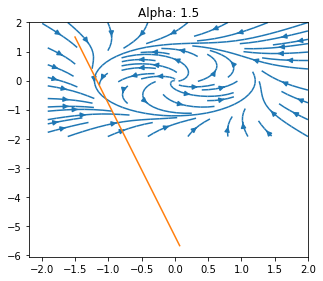

-----------------------------------------------------------
bs=1000 hs=100 lr=0.01 mm=0.9 wd=0.001 nhl=5
[ 1,  200] loss: 0.010415186
[ 1,  400] loss: 0.009920885
[ 2,  200] loss: 0.009583998
[ 2,  400] loss: 0.009184201
[ 3,  200] loss: 0.008821420
[ 3,  400] loss: 0.008803298
[ 4,  200] loss: 0.008507924
[ 4,  400] loss: 0.008376010
[ 5,  200] loss: 0.008174783
[ 5,  400] loss: 0.008094082
[ 6,  200] loss: 0.007854284
[ 6,  400] loss: 0.007707364
[ 7,  200] loss: 0.007625344
[ 7,  400] loss: 0.007580614
[ 8,  200] loss: 0.007420375
[ 8,  400] loss: 0.007456025
[ 9,  200] loss: 0.007315837
[ 9,  400] loss: 0.007169911
[10,  200] loss: 0.007005461
[10,  400] loss: 0.007053554
[11,  200] loss: 0.006959530
[11,  400] loss: 0.006836398
[12,  200] loss: 0.006732355
[12,  400] loss: 0.006729581
[13,  200] loss: 0.006672846
[13,  400] loss: 0.006656624
[14,  200] loss: 0.006562653
[14,  400] loss: 0.006489617
[15,  200] loss: 0.006295532
[15,  400] loss: 0.006362819
[16,  200] loss: 0.006374

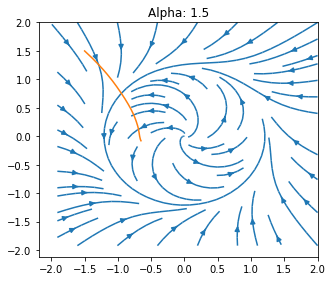

-----------------------------------------------------------
bs=1000 hs=100 lr=0.001 mm=0.9 wd=0.01 nhl=5
[ 1,  200] loss: 0.011383482
[ 1,  400] loss: 0.010145479
[ 2,  200] loss: 0.010007080
[ 2,  400] loss: 0.010019276
[ 3,  200] loss: 0.009867451
[ 3,  400] loss: 0.010015539
[ 4,  200] loss: 0.009981605
[ 4,  400] loss: 0.009825400
[ 5,  200] loss: 0.010069247
[ 5,  400] loss: 0.009927894
[ 6,  200] loss: 0.009922205
[ 6,  400] loss: 0.010030247
[ 7,  200] loss: 0.009959372
[ 7,  400] loss: 0.009942246
[ 8,  200] loss: 0.010065709
[ 8,  400] loss: 0.009717191
[ 9,  200] loss: 0.010070881
[ 9,  400] loss: 0.009868150
[10,  200] loss: 0.009881774
[10,  400] loss: 0.010001535
[11,  200] loss: 0.009900214
[11,  400] loss: 0.009958369
[12,  200] loss: 0.009955487
[12,  400] loss: 0.009929874
[13,  200] loss: 0.010016370
[13,  400] loss: 0.009944629
[14,  200] loss: 0.009871368
[14,  400] loss: 0.010028389
[15,  200] loss: 0.009920927
[15,  400] loss: 0.010012495
[16,  200] loss: 0.009998

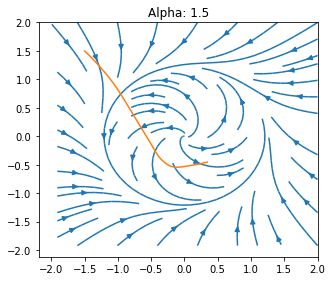

-----------------------------------------------------------
bs=1000 hs=100 lr=0.001 mm=0.9 wd=0.001 nhl=5
[ 1,  200] loss: 0.011850267
[ 1,  400] loss: 0.010272306
[ 2,  200] loss: 0.010511703
[ 2,  400] loss: 0.010177744
[ 3,  200] loss: 0.010409121
[ 3,  400] loss: 0.010172162
[ 4,  200] loss: 0.010152251


KeyboardInterrupt: 

In [64]:
# Andronov-Hopf bifurcation
def andronov_hopf(x1, x2, a):
    dx1 = a*x1 - x2 - x1*(x1**2 + x2**2)
    dx2 = x1 + a*x2 - x2*(x1**2 + x2**2)
    return dx1, dx2

def euler(alpha, delta, y):
    u,v= andronov_hopf(y[0], y[1], alpha)
    return y + delta * np.asarray([u, v])

def plot_face_portrait(alpha, index, grid, model):
    Y, X = np.mgrid[2:-2:20j, 2:-2:20j]
    U,V = andronov_hopf(X, Y, alpha)
    trajectory1 = []
    trajectory2 = []
    y1 = [-1.5, 1.5]
    y2 = [-1.5, 1.5]
    for i in range(10000):
        #trajectory1.append(y1)
        #y1 = euler(alpha, 0.001, y1)
        trajectory2.append(y2)
        y2 = model(torch.FloatTensor(y2).unsqueeze(0), torch.FloatTensor([alpha]).unsqueeze(0)).tolist()[0]
    trajectory1 = np.asarray(trajectory1).T
    trajectory2 = np.asarray(trajectory2).T
    ax = plt.subplot(grid[index, 0])
    ax.streamplot(X, Y, U, V, density=[0.5, 1])
    #ax.plot(trajectory1[0], trajectory1[1])
    ax.plot(trajectory2[0], trajectory2[1])
    ax.set_title('Alpha: ' + str(alpha))
    plt.show()
    return

h = 1

# next
hss = [100]
bss = [1000]
lrs = [0.01, 0.001]
mms = [0.9]
wds = [0.01, 0.001]
nhls = [5]
epochs = 25

validation_split = .2
random_seed = 42

#dataset_2 = CSVData(csv_file_path='second_model_2.csv')
#dataloader_2 = DataLoader(dataset_2, batch_size=1000, shuffle=True)

for bs in bss:
    dataset = CSVData(csv_file_path='second_model_2.csv')
    #dataloader = DataLoader(dataset, batch_size=bs, shuffle=True)
    
    dataset_size = len(dataset)
    indices = list(range(dataset_size))
    split = int(np.floor(validation_split * dataset_size))
    
    np.random.seed(random_seed)
    np.random.shuffle(indices)

    train_indices, val_indices = indices[split:], indices[:split]
    
    train_sampler = SubsetRandomSampler(train_indices)
    valid_sampler = SubsetRandomSampler(val_indices)

    train_loader = DataLoader(dataset, batch_size=bs, sampler=train_sampler)
    valid_loader = DataLoader(dataset, batch_size=bs, sampler=valid_sampler)
    
    for hs in hss:
        for lr in lrs:
            for mm in mms:
                for wd in wds:
                    for nhl in nhls:
                        print('-----------------------------------------------------------')
                        print('bs=' + str(bs), 'hs=' + str(hs), 'lr=' + str(lr), 'mm=' + str(mm), 
                              'wd=' + str(wd), 'nhl=' + str(nhl))
                        model = EulerN(2, 1, hs, h, nhl)
                        criterion = nn.MSELoss()
                        optimizer = optim.SGD(model.parameters(), lr=lr, momentum=mm, weight_decay=wd)
                        
                        for epoch in range(epochs):  # loop over the dataset multiple times
                            running_loss = 0.0
                            for i, data in enumerate(train_loader, 0):
                                # get the inputs; data is a list of [inputs, labels]
                                inputs, params, labels = data
                                
                                # zero the parameter gradients
                                optimizer.zero_grad()

                                # forward + backward + optimize
                                outputs = model(inputs, params)
                                loss = criterion(outputs, labels)
                                loss.backward()
                                optimizer.step()

                                # print statistics
                                running_loss += loss.item()
                                if i % 200 == 199:    # print every 2000 mini-batches
                                    print('[%2d, %4d] loss: %.9f' %
                                          (epoch + 1, i + 1, running_loss / 200))
                                    running_loss = 0.0
                                
                        print('Finished Training')
                        
                        
                        with torch.no_grad():
                            train_loss = 0.0
                            valid_loss = 0.0
                            criterion = nn.MSELoss()
                            
                            for data in train_loader:
                                inputs, params, labels = data
                                outputs = model(inputs, params)
                                loss = criterion(outputs, labels)
                                train_loss += loss.item()
                                                        
                            for data in valid_loader:
                                inputs, params, labels = data
                                outputs = model(inputs, params)
                                loss = criterion(outputs, labels)
                                valid_loss += loss.item()
                                
                            train_loss /= len(train_loader)
                            valid_loss /= len(valid_loader)
                                                        
                            print('Train loss: %.9f' % (train_loss,))
                            print('Valid loss: %.9f' % (valid_loss,))
                        
                        fig = plt.figure(figsize=(5, 25))
                        gs = gridspec.GridSpec(nrows=5, ncols=1)
                        plot_face_portrait(1.5, 0, gs, model)

-----------------------------------------------------------
bs=1000 hs=100 lr=0.01 mm=0.9 wd=1e-05 nhl=3
[ 1,  200] loss: 0.000072222
[ 1,  400] loss: 0.000000077
[ 1,  600] loss: 0.000000027
[ 1,  800] loss: 0.000000029
[ 2,  200] loss: 0.000000070
[ 2,  400] loss: 0.000000076
[ 2,  600] loss: 0.000000038
[ 2,  800] loss: 0.000000107
[ 3,  200] loss: 0.000000064
[ 3,  400] loss: 0.000000108
[ 3,  600] loss: 0.000000158
[ 3,  800] loss: 0.000000198
[ 4,  200] loss: 0.000000275
[ 4,  400] loss: 0.000000319
[ 4,  600] loss: 0.000000336
[ 4,  800] loss: 0.000000360
[ 5,  200] loss: 0.000000515
[ 5,  400] loss: 0.000000479
[ 5,  600] loss: 0.000000643
[ 5,  800] loss: 0.000000722
[ 6,  200] loss: 0.000000648
[ 6,  400] loss: 0.000000880
[ 6,  600] loss: 0.000000425
[ 6,  800] loss: 0.000001018
[ 7,  200] loss: 0.000000415
[ 7,  400] loss: 0.000000941
[ 7,  600] loss: 0.000000561
[ 7,  800] loss: 0.000000833
[ 8,  200] loss: 0.000000740
[ 8,  400] loss: 0.000000858
[ 8,  600] loss: 0.000000

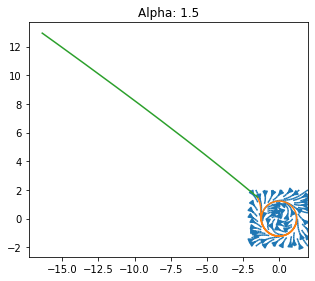

-----------------------------------------------------------
bs=1000 hs=100 lr=0.01 mm=0.9 wd=0 nhl=3
[ 1,  200] loss: 0.000115440
[ 1,  400] loss: 0.000000101
[ 1,  600] loss: 0.000000041
[ 1,  800] loss: 0.000000024
[ 2,  200] loss: 0.000000016
[ 2,  400] loss: 0.000000012
[ 2,  600] loss: 0.000000010
[ 2,  800] loss: 0.000000009
[ 3,  200] loss: 0.000000007
[ 3,  400] loss: 0.000000006
[ 3,  600] loss: 0.000000008
[ 3,  800] loss: 0.000000705
[ 4,  200] loss: 0.000000504
[ 4,  400] loss: 0.000000444
[ 4,  600] loss: 0.000000779
[ 4,  800] loss: 0.000000238
[ 5,  200] loss: 0.000000851
[ 5,  400] loss: 0.000000401
[ 5,  600] loss: 0.000000772
[ 5,  800] loss: 0.000000379
[ 6,  200] loss: 0.000000876
[ 6,  400] loss: 0.000000560
[ 6,  600] loss: 0.000000776
[ 6,  800] loss: 0.000000417
[ 7,  200] loss: 0.000000465
[ 7,  400] loss: 0.000000692
[ 7,  600] loss: 0.000000429
[ 7,  800] loss: 0.000000458
[ 8,  200] loss: 0.000000634
[ 8,  400] loss: 0.000000271
[ 8,  600] loss: 0.000000385


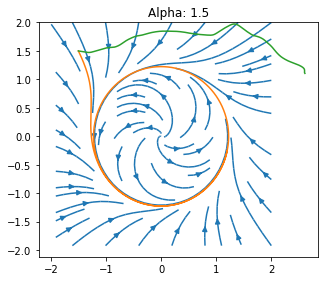

-----------------------------------------------------------
bs=1000 hs=100 lr=0.001 mm=0.9 wd=1e-05 nhl=3
[ 1,  200] loss: 0.000260467
[ 1,  400] loss: 0.000001865
[ 1,  600] loss: 0.000000840
[ 1,  800] loss: 0.000000505
[ 2,  200] loss: 0.000000345
[ 2,  400] loss: 0.000000247
[ 2,  600] loss: 0.000000200
[ 2,  800] loss: 0.000000194
[ 3,  200] loss: 0.000000134
[ 3,  400] loss: 0.000000080
[ 3,  600] loss: 0.000000052
[ 3,  800] loss: 0.000000032
[ 4,  200] loss: 0.000000023
[ 4,  400] loss: 0.000000020
[ 4,  600] loss: 0.000000018
[ 4,  800] loss: 0.000000015
[ 5,  200] loss: 0.000000010
[ 5,  400] loss: 0.000000007
[ 5,  600] loss: 0.000000004
[ 5,  800] loss: 0.000000004
[ 6,  200] loss: 0.000000004
[ 6,  400] loss: 0.000000005
[ 6,  600] loss: 0.000000004
[ 6,  800] loss: 0.000000005
[ 7,  200] loss: 0.000000005
[ 7,  400] loss: 0.000000005
[ 7,  600] loss: 0.000000005
[ 7,  800] loss: 0.000000005
[ 8,  200] loss: 0.000000005
[ 8,  400] loss: 0.000000006
[ 8,  600] loss: 0.00000

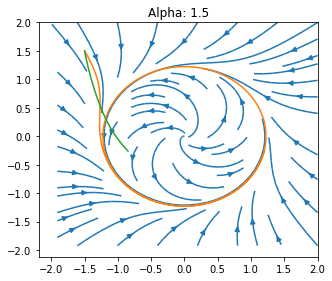

-----------------------------------------------------------
bs=1000 hs=100 lr=0.001 mm=0.9 wd=0 nhl=3
[ 1,  200] loss: 0.000838303
[ 1,  400] loss: 0.000003915
[ 1,  600] loss: 0.000001626
[ 1,  800] loss: 0.000000804
[ 2,  200] loss: 0.000000531
[ 2,  400] loss: 0.000000384
[ 2,  600] loss: 0.000000287
[ 2,  800] loss: 0.000000240
[ 3,  200] loss: 0.000000201
[ 3,  400] loss: 0.000000169
[ 3,  600] loss: 0.000000150
[ 3,  800] loss: 0.000000132
[ 4,  200] loss: 0.000000118
[ 4,  400] loss: 0.000000105
[ 4,  600] loss: 0.000000092
[ 4,  800] loss: 0.000000082
[ 5,  200] loss: 0.000000075
[ 5,  400] loss: 0.000000063
[ 5,  600] loss: 0.000000058
[ 5,  800] loss: 0.000000048
[ 6,  200] loss: 0.000000043
[ 6,  400] loss: 0.000000037
[ 6,  600] loss: 0.000000033
[ 6,  800] loss: 0.000000029
[ 7,  200] loss: 0.000000026
[ 7,  400] loss: 0.000000024
[ 7,  600] loss: 0.000000021
[ 7,  800] loss: 0.000000020
[ 8,  200] loss: 0.000000018
[ 8,  400] loss: 0.000000016
[ 8,  600] loss: 0.000000015

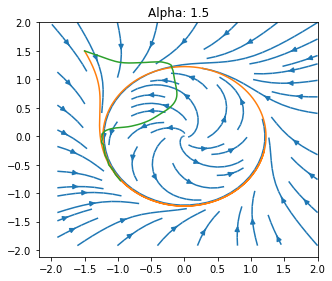

In [69]:
# Andronov-Hopf bifurcation
def andronov_hopf(x1, x2, a):
    dx1 = a*x1 - x2 - x1*(x1**2 + x2**2)
    dx2 = x1 + a*x2 - x2*(x1**2 + x2**2)
    return dx1, dx2

def euler(alpha, delta, y):
    u,v= andronov_hopf(y[0], y[1], alpha)
    return y + delta * np.asarray([u, v])

def plot_face_portrait(alpha, index, grid, model):
    Y, X = np.mgrid[2:-2:20j, 2:-2:20j]
    U,V = andronov_hopf(X, Y, alpha)
    trajectory1 = []
    trajectory2 = []
    y1 = [-1.5, 1.5]
    y2 = [-1.5, 1.5]
    for i in range(10000):
        trajectory1.append(y1)
        y1 = euler(alpha, 0.001, y1)
        trajectory2.append(y2)
        y2 = model(torch.FloatTensor(y2).unsqueeze(0), torch.FloatTensor([alpha]).unsqueeze(0)).tolist()[0]
    trajectory1 = np.asarray(trajectory1).T
    trajectory2 = np.asarray(trajectory2).T
    ax = plt.subplot(grid[index, 0])
    ax.streamplot(X, Y, U, V, density=[0.5, 1])
    ax.plot(trajectory1[0], trajectory1[1])
    ax.plot(trajectory2[0], trajectory2[1])
    ax.set_title('Alpha: ' + str(alpha))
    plt.show()
    return

h = 1

# next
hss = [100]
bss = [1000]
lrs = [0.01, 0.001]
mms = [0.9]
wds = [0.00001, 0]
nhls = [3]
epochs = 10

validation_split = .2
random_seed = 42

#dataset_2 = CSVData(csv_file_path='second_model_2.csv')
#dataloader_2 = DataLoader(dataset_2, batch_size=1000, shuffle=True)

for bs in bss:
    dataset = CSVData(csv_file_path='second_model_2.csv')
    #dataloader = DataLoader(dataset, batch_size=bs, shuffle=True)
    
    dataset_size = len(dataset)
    indices = list(range(dataset_size))
    split = int(np.floor(validation_split * dataset_size))
    
    np.random.seed(random_seed)
    np.random.shuffle(indices)

    train_indices, val_indices = indices[split:], indices[:split]
    
    train_sampler = SubsetRandomSampler(train_indices)
    valid_sampler = SubsetRandomSampler(val_indices)

    train_loader = DataLoader(dataset, batch_size=bs, sampler=train_sampler)
    valid_loader = DataLoader(dataset, batch_size=bs, sampler=valid_sampler)
    
    for hs in hss:
        for lr in lrs:
            for mm in mms:
                for wd in wds:
                    for nhl in nhls:
                        print('-----------------------------------------------------------')
                        print('bs=' + str(bs), 'hs=' + str(hs), 'lr=' + str(lr), 'mm=' + str(mm), 
                              'wd=' + str(wd), 'nhl=' + str(nhl))
                        model = EulerN(2, 1, hs, h, nhl)
                        criterion = nn.MSELoss()
                        optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
                        
                        for epoch in range(epochs):  # loop over the dataset multiple times
                            running_loss = 0.0
                            for i, data in enumerate(train_loader, 0):
                                # get the inputs; data is a list of [inputs, labels]
                                inputs, params, labels = data
                                
                                # zero the parameter gradients
                                optimizer.zero_grad()

                                # forward + backward + optimize
                                outputs = model(inputs, params)
                                loss = criterion(outputs, labels)
                                loss.backward()
                                optimizer.step()

                                # print statistics
                                running_loss += loss.item()
                                if i % 200 == 199:    # print every 2000 mini-batches
                                    print('[%2d, %4d] loss: %.9f' %
                                          (epoch + 1, i + 1, running_loss / 200))
                                    running_loss = 0.0
                                
                        print('Finished Training')
                        
                        
                        with torch.no_grad():
                            train_loss = 0.0
                            valid_loss = 0.0
                            criterion = nn.MSELoss()
                            
                            for data in train_loader:
                                inputs, params, labels = data
                                outputs = model(inputs, params)
                                loss = criterion(outputs, labels)
                                train_loss += loss.item()
                                                        
                            for data in valid_loader:
                                inputs, params, labels = data
                                outputs = model(inputs, params)
                                loss = criterion(outputs, labels)
                                valid_loss += loss.item()
                                
                            train_loss /= len(train_loader)
                            valid_loss /= len(valid_loader)
                                                        
                            print('Train loss: %.15f' % (train_loss,))
                            print('Valid loss: %.15f' % (valid_loss,))
                        
                        fig = plt.figure(figsize=(5, 25))
                        gs = gridspec.GridSpec(nrows=5, ncols=1)
                        plot_face_portrait(1.5, 0, gs, model)

-----------------------------------------------------------
bs=1000 hs=100 lr=0.01 mm=0.9 wd=0 nhl=3
[ 1,  200] loss: 0.000315865977209
[ 1,  400] loss: 0.000055840991549
[ 1,  600] loss: 0.000035750538168
[ 1,  800] loss: 0.000023045969663
[ 1, 1000] loss: 0.000019171343810
[ 1, 1200] loss: 0.000014910677772
[ 1, 1400] loss: 0.000015007642743
[ 1, 1600] loss: 0.000013848939149
[ 1, 1800] loss: 0.000016238270950
[ 1, 2000] loss: 0.000015314635233
[ 1, 2200] loss: 0.000015696294997
[ 1, 2400] loss: 0.000011389960405
[ 1, 2600] loss: 0.000019865244700
[ 1, 2800] loss: 0.000012940726228
[ 1, 3000] loss: 0.000011476559320
[ 1, 3200] loss: 0.000012528898892
[ 1, 3400] loss: 0.000008617171934
[ 1, 3600] loss: 0.000008034662945
[ 1, 3800] loss: 0.000013422748901
[ 1, 4000] loss: 0.000010584123225
[ 1, 4200] loss: 0.000011499672180
[ 2,  200] loss: 0.000010690373878
[ 2,  400] loss: 0.000008651082829
[ 2,  600] loss: 0.000010484657921
[ 2,  800] loss: 0.000010407436520
[ 2, 1000] loss: 0.00001

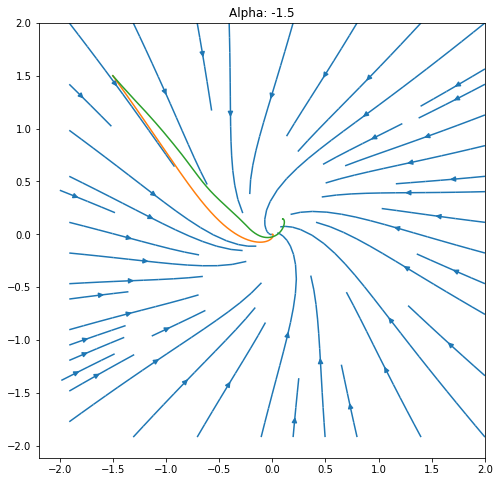

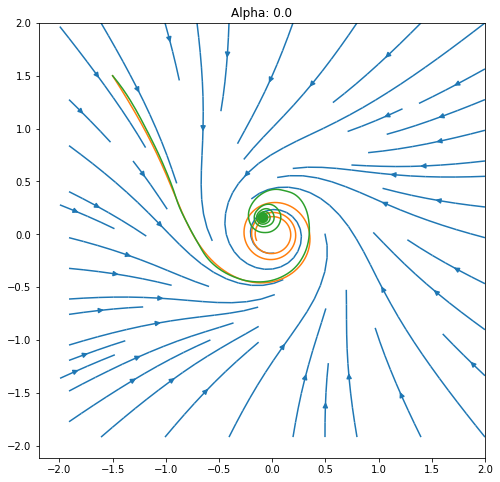

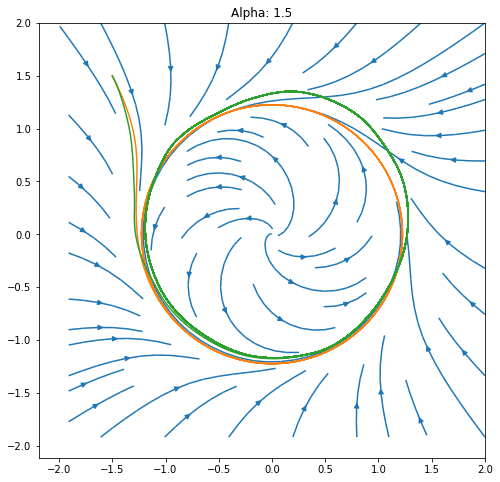

-----------------------------------------------------------
bs=1000 hs=100 lr=0.001 mm=0.9 wd=0 nhl=3
[ 1,  200] loss: 0.000769879011068
[ 1,  400] loss: 0.000268959397326
[ 1,  600] loss: 0.000127367119658
[ 1,  800] loss: 0.000098735030106
[ 1, 1000] loss: 0.000075858656628
[ 1, 1200] loss: 0.000069027761010
[ 1, 1400] loss: 0.000058373693951
[ 1, 1600] loss: 0.000048357099586
[ 1, 1800] loss: 0.000050187654710
[ 1, 2000] loss: 0.000036292615767
[ 1, 2200] loss: 0.000030484118161
[ 1, 2400] loss: 0.000033104733417
[ 1, 2600] loss: 0.000023732729318
[ 1, 2800] loss: 0.000025405389382
[ 1, 3000] loss: 0.000021026427639
[ 1, 3200] loss: 0.000015272169082
[ 1, 3400] loss: 0.000019914932567
[ 1, 3600] loss: 0.000016158018009
[ 1, 3800] loss: 0.000014640634669
[ 1, 4000] loss: 0.000013521015213
[ 1, 4200] loss: 0.000011746653717
[ 2,  200] loss: 0.000010840564124
[ 2,  400] loss: 0.000010614514023
[ 2,  600] loss: 0.000011943775753
[ 2,  800] loss: 0.000010404999263
[ 2, 1000] loss: 0.0000

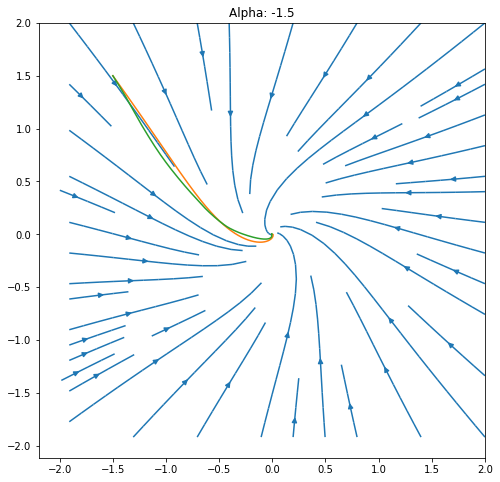

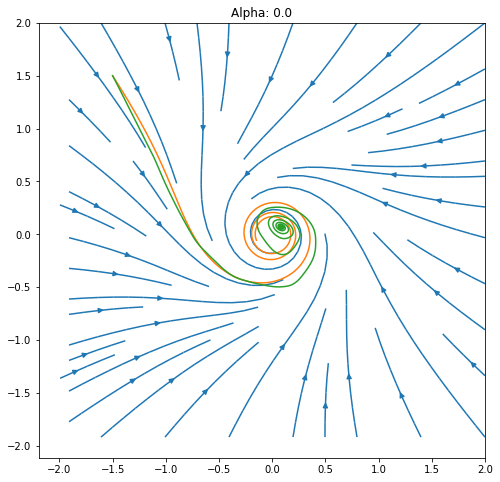

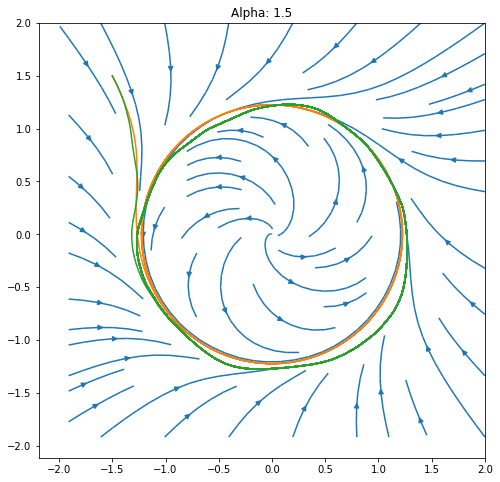

-----------------------------------------------------------
bs=1000 hs=100 lr=0.0001 mm=0.9 wd=0 nhl=3
[ 1,  200] loss: 0.004457531220396
[ 1,  400] loss: 0.001454995033564
[ 1,  600] loss: 0.000792536910012
[ 1,  800] loss: 0.000563726720575
[ 1, 1000] loss: 0.000450817844867
[ 1, 1200] loss: 0.000410692660953
[ 1, 1400] loss: 0.000398347474147
[ 1, 1600] loss: 0.000383909089142
[ 1, 1800] loss: 0.000344462087087
[ 1, 2000] loss: 0.000332537688391
[ 1, 2200] loss: 0.000288344658111
[ 1, 2400] loss: 0.000313163943447
[ 1, 2600] loss: 0.000266529284672
[ 1, 2800] loss: 0.000219154280476
[ 1, 3000] loss: 0.000233790659431
[ 1, 3200] loss: 0.000224394512879
[ 1, 3400] loss: 0.000227705878169
[ 1, 3600] loss: 0.000268468565437
[ 1, 3800] loss: 0.000245481407392
[ 1, 4000] loss: 0.000195847757923
[ 1, 4200] loss: 0.000191875157043
[ 2,  200] loss: 0.000186142844177
[ 2,  400] loss: 0.000144925761606
[ 2,  600] loss: 0.000140589605817
[ 2,  800] loss: 0.000148809391399
[ 2, 1000] loss: 0.000

KeyboardInterrupt: 

In [83]:
# Andronov-Hopf bifurcation
def andronov_hopf(x1, x2, a):
    dx1 = a*x1 - x2 - x1*(x1**2 + x2**2)
    dx2 = x1 + a*x2 - x2*(x1**2 + x2**2)
    return dx1, dx2

def euler(alpha, delta, y):
    u,v= andronov_hopf(y[0], y[1], alpha)
    return y + delta * np.asarray([u, v])

def plot_face_portrait(alpha, model):
    Y, X = np.mgrid[2:-2:20j, 2:-2:20j]
    U,V = andronov_hopf(X, Y, alpha)
    trajectory1 = []
    trajectory2 = []
    y1 = [-1.5, 1.5]
    y2 = [-1.5, 1.5]
    for i in range(20000):
        trajectory1.append(y1)
        y1 = euler(alpha, 0.001, y1)
        trajectory2.append(y2)
        y2 = model(torch.FloatTensor(y2).unsqueeze(0), torch.FloatTensor([alpha]).unsqueeze(0)).tolist()[0]
    trajectory1 = np.asarray(trajectory1).T
    trajectory2 = np.asarray(trajectory2).T
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111)
    ax.streamplot(X, Y, U, V, density=[0.5, 1])
    ax.plot(trajectory1[0], trajectory1[1])
    ax.plot(trajectory2[0], trajectory2[1])
    ax.set_title('Alpha: ' + str(alpha))
    plt.show()
    return

h = 1

# next
hss = [100]
bss = [1000]
lrs = [0.01, 0.001, 0.0001]
mms = [0.9]
wds = [0]
nhls = [3]
epochs = 10

validation_split = .2
random_seed = 42

#dataset_2 = CSVData(csv_file_path='second_model_2.csv')
#dataloader_2 = DataLoader(dataset_2, batch_size=1000, shuffle=True)

for bs in bss:
    dataset = CSVData(csv_file_path='second_model_2.csv')
    #dataloader = DataLoader(dataset, batch_size=bs, shuffle=True)
    
    dataset_size = len(dataset)
    indices = list(range(dataset_size))
    split = int(np.floor(validation_split * dataset_size))
    
    np.random.seed(random_seed)
    np.random.shuffle(indices)

    train_indices, val_indices = indices[split:], indices[:split]
    
    train_sampler = SubsetRandomSampler(train_indices)
    valid_sampler = SubsetRandomSampler(val_indices)

    train_loader = DataLoader(dataset, batch_size=bs, sampler=train_sampler)
    valid_loader = DataLoader(dataset, batch_size=bs, sampler=valid_sampler)
    
    for hs in hss:
        for lr in lrs:
            for mm in mms:
                for wd in wds:
                    for nhl in nhls:
                        print('-----------------------------------------------------------')
                        print('bs=' + str(bs), 'hs=' + str(hs), 'lr=' + str(lr), 'mm=' + str(mm), 
                              'wd=' + str(wd), 'nhl=' + str(nhl))
                        model = EulerN(2, 1, hs, h, nhl)
                        criterion = nn.MSELoss()
                        optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
                        
                        for epoch in range(epochs):  # loop over the dataset multiple times
                            running_loss = 0.0
                            for i, data in enumerate(train_loader, 0):
                                # get the inputs; data is a list of [inputs, labels]
                                inputs, params, labels = data
                                
                                # zero the parameter gradients
                                optimizer.zero_grad()

                                # forward + backward + optimize
                                outputs = model(inputs, params)
                                loss = criterion(outputs, labels)
                                loss.backward()
                                optimizer.step()

                                # print statistics
                                running_loss += loss.item()
                                if i % 200 == 199:    # print every 2000 mini-batches
                                    print('[%2d, %4d] loss: %.15f' %
                                          (epoch + 1, i + 1, running_loss / 200))
                                    running_loss = 0.0
                                
                        print('Finished Training')
                        
                        
                        with torch.no_grad():
                            train_loss = 0.0
                            valid_loss = 0.0
                            criterion = nn.MSELoss()
                            
                            for data in train_loader:
                                inputs, params, labels = data
                                outputs = model(inputs, params)
                                loss = criterion(outputs, labels)
                                train_loss += loss.item()
                                                        
                            for data in valid_loader:
                                inputs, params, labels = data
                                outputs = model(inputs, params)
                                loss = criterion(outputs, labels)
                                valid_loss += loss.item()
                                
                            train_loss /= len(train_loader)
                            valid_loss /= len(valid_loader)
                                                        
                            print('Train loss: %.15f' % (train_loss,))
                            print('Valid loss: %.15f' % (valid_loss,))
                        
                        plot_face_portrait(-1.5, model)
                        plot_face_portrait( 0.0, model)
                        plot_face_portrait( 1.5, model)

In [ ]:
def plot_face_portrait(alpha, model):
    Y, X = np.mgrid[2:-2:20j, 2:-2:20j]
    U,V = andronov_hopf(X, Y, alpha)
    trajectory1 = []
    trajectory2 = []
    y1 = [-1.5, 1.5]
    y2 = [-1.5, 1.5]
    for i in range(20000):
        trajectory1.append(y1)
        y1 = euler(alpha, 0.001, y1)
        trajectory2.append(y2)
        y2 = model(torch.FloatTensor(y2).unsqueeze(0), torch.FloatTensor([alpha]).unsqueeze(0)).tolist()[0]
    trajectory1 = np.asarray(trajectory1).T
    trajectory2 = np.asarray(trajectory2).T
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111)
    ax.streamplot(X, Y, U, V, density=[0.5, 1])
    ax.plot(trajectory1[0], trajectory1[1])
    ax.plot(trajectory2[0], trajectory2[1])
    ax.set_title('Alpha: ' + str(alpha))
    plt.show()
    return

In [ ]:
plot_face_portrait(-1.5, model)
plot_face_portrait( 0.0, model)
plot_face_portrait( 1.5, model)